In this file, I will visualize the relationship among happiness, employment status and family status.

In [9]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from code.organize import *
%matplotlib inline


In [6]:
df= pd.read_pickle('data/employ.pkl')

In [7]:
df.head(3)

,year,id_,wrkstat,marital,sex,happy,whrs,married,has_babies,has_preteen,has_teens
0,1994,2,Working fulltime,Married,Male,Very happy,40,True,False,False,False
1,1994,5,Working parttime,Never married,Female,Not too happy,20,False,False,True,True
2,1994,11,Working fulltime,Never married,Female,Pretty happy,40,False,False,False,False


In [10]:
dict = extr_val_labels('data/employment/GSS.sps')

In [13]:
df.happy = df.happy.apply(lambda x:dict['happy'][x])

In [50]:
df.columns

Index([u'year', u'id_', u'wrkstat', u'marital', u'sex', u'happy', u'whrs',
       u'married', u'has_babies', u'has_preteen', u'has_teens'],
      dtype='object')

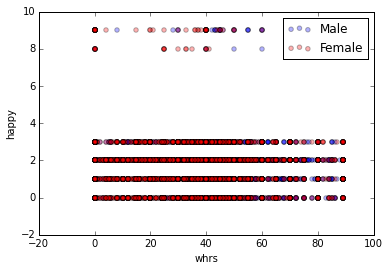

In [26]:
ax = df[df.sex =='Male'].plot(x = 'whrs',y = 'happy', kind = 'scatter', label = 'Male', c = 'blue',alpha = 0.3)
df[df.sex =="Female"].plot(x = 'whrs',y = 'happy', kind = 'scatter', label = 'Female', c = 'r',ax = ax, alpha = 0.3)

In [79]:
t1994 = df[df.year == 1994].groupby(['has_babies','sex'])['whrs','happy'].agg([np.mean])
t1996 = df[df.year == 1996].groupby(['has_babies','sex'])['whrs','happy'].agg([np.mean])
t1998 = df[df.year == 1998].groupby(['has_babies','sex'])['whrs','happy'].agg([np.mean])
s = df.groupby(['has_preteen','sex'])['whrs','happy'].mean()

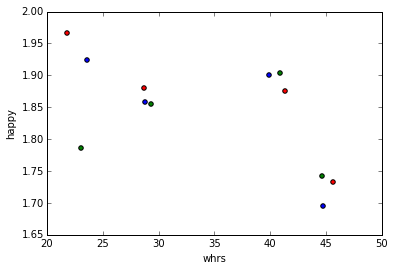

In [81]:
ax = t1994.plot(x = 'whrs',y='happy', kind = 'scatter')
t1996.plot(x = 'whrs', y = 'happy', kind = 'scatter', c = 'r', ax = ax)
t1998.plot(x = 'whrs', y = 'happy', kind = 'scatter', c = 'g', ax = ax)